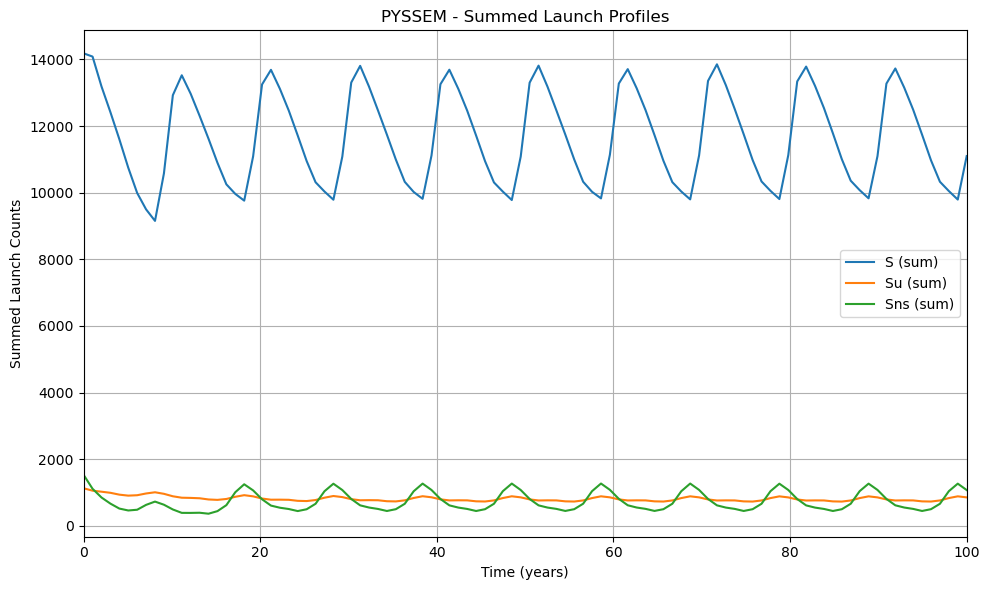

In [ ]:
import matplotlib.pyplot as plt
import json


times = data["times"]
launch_list = data["launch"]

# 1) Define the prefixes you care about
prefixes = ["S", "Su", "Sns"]

# 2) Build a dict: prefix → summed counts
summed_launch = {}
for prefix in prefixes:
    # grab all count‐arrays for species matching this prefix
    matching = [entry["counts"]
                for entry in launch_list
                if entry["species"].startswith(prefix)]
    if matching:
        # elementwise sum across the matching lists
        summed = [sum(vals) for vals in zip(*matching)]
    else:
        # no matches → all zeros
        summed = [0]*len(times)
    summed_launch[prefix] = summed

# 3) Plot them
plt.figure(figsize=(10,6))
for prefix, counts in summed_launch.items():
    plt.plot(times, counts, label=f"{prefix} (sum)")

plt.xlabel("Time (years)")
plt.ylabel("Summed Launch Counts")
plt.title("PYSSEM - Summed Launch Profiles")
plt.xlim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

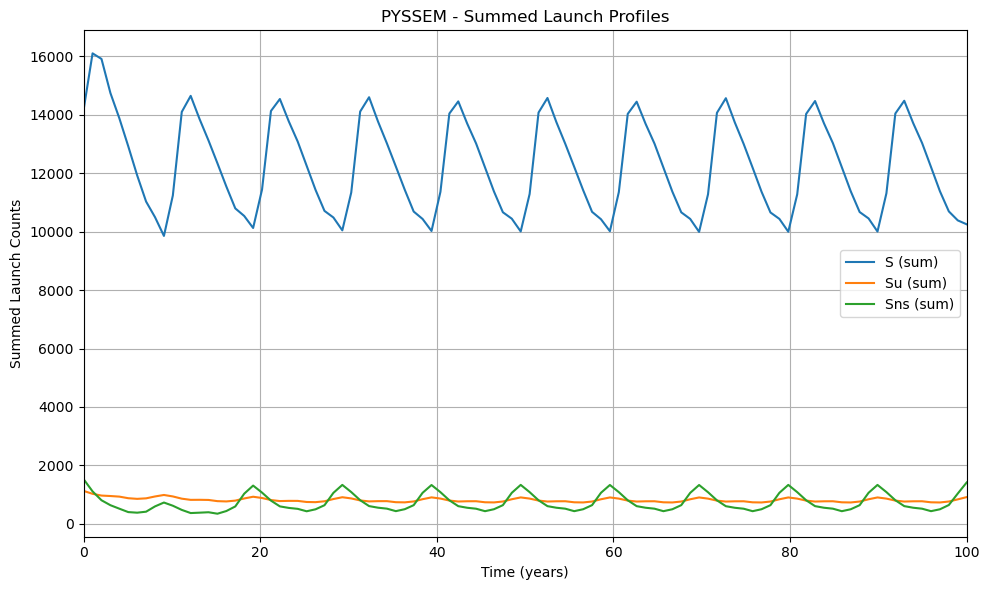

  Species  Population  Year
0       S      8166.0  2025
1       S      6768.0  2027
2       S      8491.0  2029
3       S      9830.0  2031
4       S     10635.5  2033


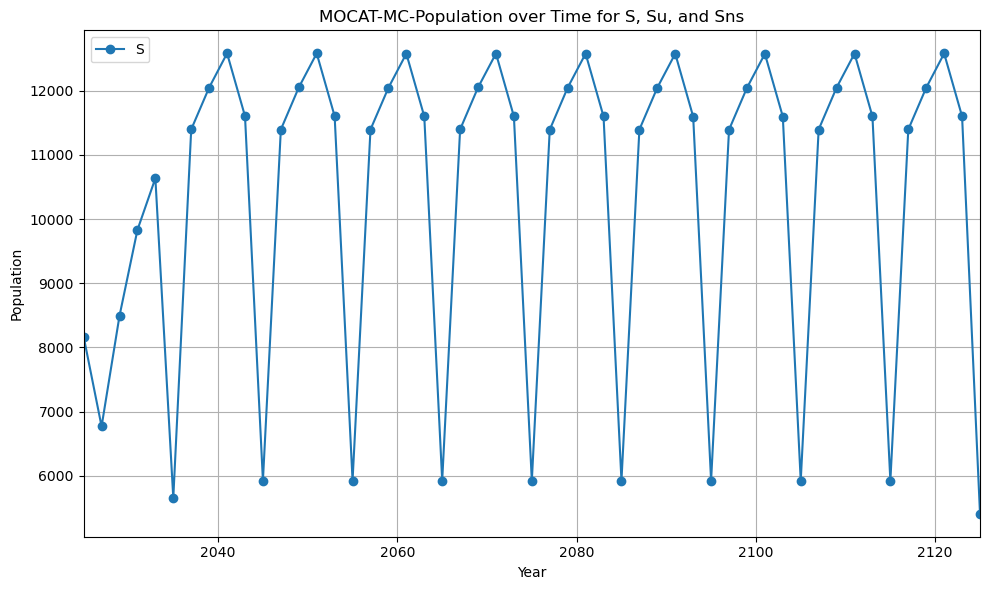

In [10]:
import json 

path = '/Users/indigobrownhall/Code/pyssem/figures/SEP2/results.json'

with open(path, "r") as f:
    data = json.load(f)

times = data["times"]
launch_list = data["launch"]

# 1) Define the prefixes you care about
prefixes = ["S", "Su", "Sns"]

# 2) Build a dict: prefix → summed counts
summed_launch = {}
for prefix in prefixes:
    # grab all count‐arrays for species matching this prefix
    matching = [entry["counts"]
                for entry in launch_list
                if entry["species"].startswith(prefix)]
    if matching:
        # elementwise sum across the matching lists
        summed = [sum(vals) for vals in zip(*matching)]
    else:
        # no matches → all zeros
        summed = [0]*len(times)
    summed_launch[prefix] = summed

# 3) Plot them
plt.figure(figsize=(10,6))
for prefix, counts in summed_launch.items():
    plt.plot(times, counts, label=f"{prefix} (sum)")

plt.xlabel("Time (years)")
plt.ylabel("Summed Launch Counts")
plt.title("PYSSEM - Summed Launch Profiles")
plt.xlim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
# 1) Path to your CSV file (adjust as needed)
path = '/Users/indigobrownhall/Code/MOCAT-VnV/results/pop_time-100yr.csv'

# 2) Load
df = pd.read_csv(path)
df['Species'] = df['Species'].replace({'SU': 'Su', 'SNS': 'Sns'})

# 3) Filter for those three species
species_of_interest = ['S', 'SU', 'SNS']
df_filtered = df[df['Species'].isin(species_of_interest)]

# 4) Sanity check
print(df_filtered.head())

# 5) Plot each species
plt.figure(figsize=(10, 6))
for species, grp in df_filtered.groupby('Species'):
    plt.plot(grp['Year'], grp['Population'], marker='o', label=species)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("MOCAT-MC-Population over Time for S, Su, and Sns")
plt.xlim(df_filtered['Year'].min(), df_filtered['Year'].max())
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

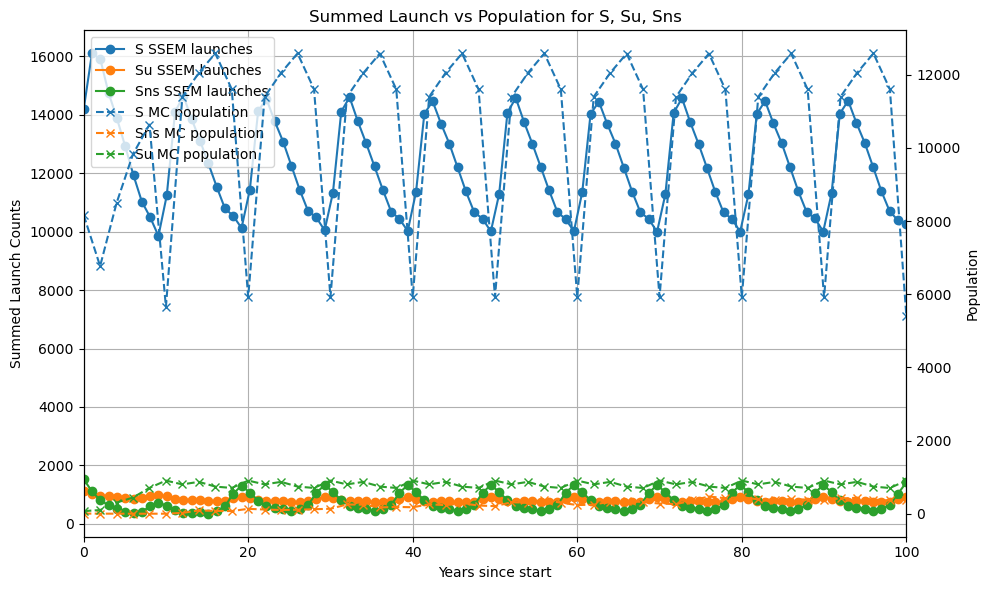

In [13]:
# compute relative years
df['Year_rel'] = df['Year'] - df['Year'].min()
dff = df[df['Species'].isin(['S','Su','Sns'])]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# launches
for prefix, counts in summed_launch.items():
    ax1.plot(times, counts, label=f"{prefix} SSEM launches", linestyle='-', marker='o')
ax1.set_ylabel("Summed Launch Counts")

# population
for species, grp in dff.groupby('Species'):
    ax2.plot(grp['Year_rel'], grp['Population'], label=f"{species} MC population", linestyle='--', marker='x')
ax2.set_ylabel("Population")

ax1.set_xlabel("Years since start")
ax1.set_xlim(0, 100)
ax1.grid(True)

# combined legend
h1,l1 = ax1.get_legend_handles_labels()
h2,l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

plt.title("Summed Launch vs Population for S, Su, Sns")
plt.tight_layout()
plt.show()

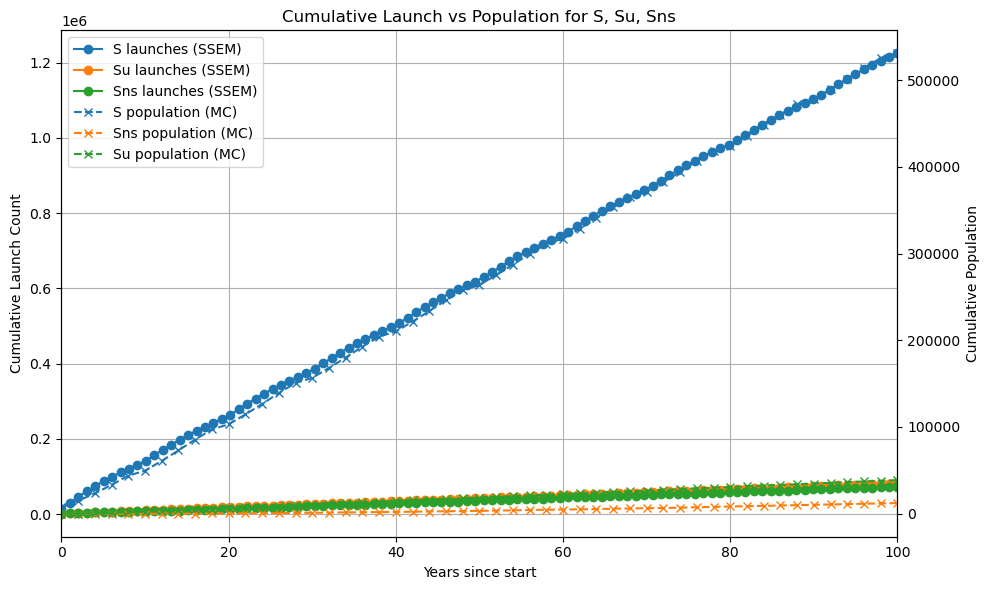

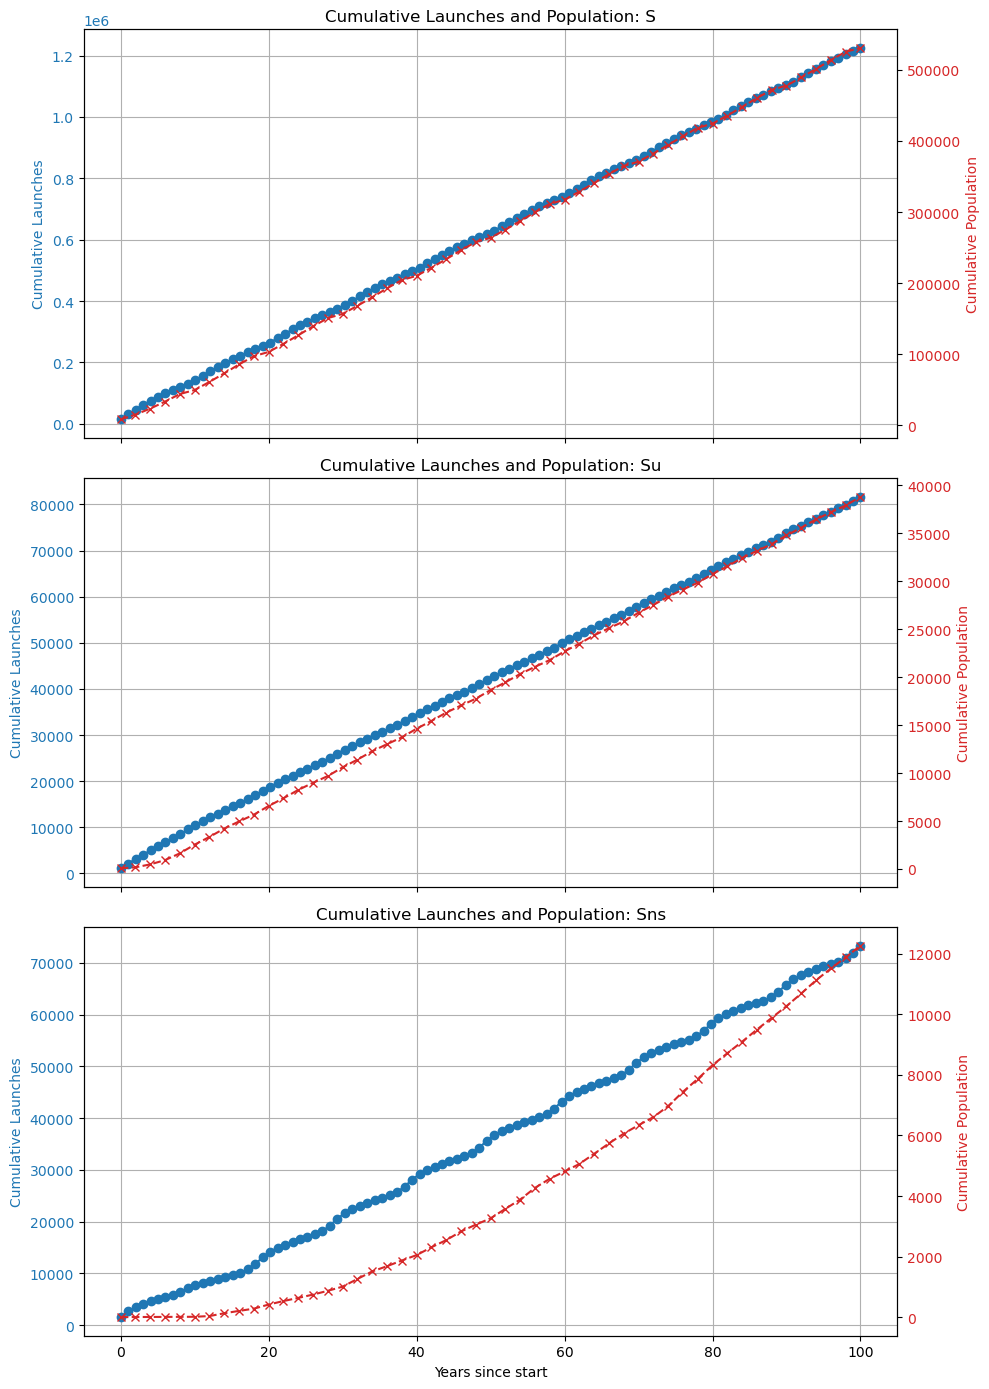

In [14]:
import numpy as np
# compute relative years
df['Year_rel'] = df['Year'] - df['Year'].min()
dff = df[df['Species'].isin(['S','Su','Sns'])]

# Cumulative summed launches
cumulative_launch = {k: np.cumsum(v) for k, v in summed_launch.items()}

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Cumulative launches
for prefix, counts in cumulative_launch.items():
    ax1.plot(times, counts, label=f"{prefix} launches (SSEM)", linestyle='-', marker='o')
ax1.set_ylabel("Cumulative Launch Count")

# Cumulative population
for species, grp in dff.groupby('Species'):
    grp_sorted = grp.sort_values('Year_rel')
    cumulative_pop = np.cumsum(grp_sorted['Population'].values)
    ax2.plot(grp_sorted['Year_rel'], cumulative_pop, label=f"{species} population (MC)", linestyle='--', marker='x')
ax2.set_ylabel("Cumulative Population")

ax1.set_xlabel("Years since start")
ax1.set_xlim(0, 100)
ax1.grid(True)

# combined legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

plt.title("Cumulative Launch vs Population for S, Su, Sns")
plt.tight_layout()
plt.show()

species_list = ['S', 'Su', 'Sns']
fig, axes = plt.subplots(3, 1, figsize=(10, 14), sharex=True)

for i, species in enumerate(species_list):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # --- Cumulative Launches ---
    if species in summed_launch:
        cumulative_launch = np.cumsum(summed_launch[species])
        ax1.plot(times, cumulative_launch, label=f"{species} launches (SSEM)", linestyle='-', marker='o', color='tab:blue')
        ax1.set_ylabel("Cumulative Launches", color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')
    else:
        ax1.set_ylabel("No Launch Data", color='tab:blue')

    # --- Cumulative Population ---
    grp = dff[dff['Species'] == species].sort_values('Year_rel')
    if not grp.empty:
        cumulative_pop = np.cumsum(grp['Population'].values)
        ax2.plot(grp['Year_rel'], cumulative_pop, label=f"{species} population (MC)", linestyle='--', marker='x', color='tab:red')
        ax2.set_ylabel("Cumulative Population", color='tab:red')
        ax2.tick_params(axis='y', labelcolor='tab:red')
    
    ax1.set_title(f"Cumulative Launches and Population: {species}")
    ax1.grid(True)

axes[-1].set_xlabel("Years since start")
plt.tight_layout()
plt.show()